In [2]:
import numpy
import pandas
import matplotlib
import matplotlib.pyplot
%matplotlib inline

from n2lite import n2lite

In [3]:
beam_list = ['2l', '2r', '3l', '3r',
                       '4l', '4r', '5l', '5r', 
                       '1lu', '1ll', '1ru', '1rl']

In [84]:
# read hot data

beam1 = '5l'
beam2 = '5r'
beam = [beam1, beam2]

fn_hot = '20181113_070630'
fn_cold = '20181113_073617'

path_cold = '/home/amigos/data/sql/hemt_sweep/' + fn_cold + '/param.db'
path_hot = '/home/amigos/data/sql/hemt_sweep/' + fn_hot + '/param.db'

In [85]:
_cold = n2lite.N2lite(path_cold)
cold = _cold.read_pandas_all()
_hot = n2lite.N2lite(path_hot)
hot = _hot.read_pandas_all()

In [86]:
hot.keys()

Index(['time', 'sis_vol_2l', 'sis_vol_2r', 'sis_vol_3l', 'sis_vol_3r',
       'sis_vol_4l', 'sis_vol_4r', 'sis_vol_5l', 'sis_vol_5r', 'sis_vol_1lu',
       'sis_vol_1ll', 'sis_vol_1ru', 'sis_vol_1rl', 'sis_cur_2l', 'sis_cur_2r',
       'sis_cur_3l', 'sis_cur_3r', 'sis_cur_4l', 'sis_cur_4r', 'sis_cur_5l',
       'sis_cur_5r', 'sis_cur_1lu', 'sis_cur_1ll', 'sis_cur_1ru',
       'sis_cur_1rl', 'hemt_vd_2l', 'hemt_vd_2r', 'hemt_vd_3l', 'hemt_vd_3r',
       'hemt_vd_4l', 'hemt_vd_4r', 'hemt_vd_5l', 'hemt_vd_5r', 'hemt_vd_1lu',
       'hemt_vd_1ll', 'hemt_vd_1ru', 'hemt_vd_1rl', 'hemt_vg1_2l',
       'hemt_vg1_2r', 'hemt_vg1_3l', 'hemt_vg1_3r', 'hemt_vg1_4l',
       'hemt_vg1_4r', 'hemt_vg1_5l', 'hemt_vg1_5r', 'hemt_vg1_1lu',
       'hemt_vg1_1ll', 'hemt_vg1_1ru', 'hemt_vg1_1rl', 'hemt_vg2_2l',
       'hemt_vg2_2r', 'hemt_vg2_3l', 'hemt_vg2_3r', 'hemt_vg2_4l',
       'hemt_vg2_4r', 'hemt_vg2_5l', 'hemt_vg2_5r', 'hemt_vg2_1lu',
       'hemt_vg2_1ll', 'hemt_vg2_1ru', 'hemt_vg2_1rl', 'hemt_id_2

In [87]:
# set tuning param

initial_vg1 = -2
final_vg1 = 2
initial_vg2 = -2
final_vg2 = 2
step = 0.1
roop_vg1 = int((final_vg1- initial_vg1) / step) + 1
roop_vg2 = int((final_vg2- initial_vg2) / step) + 1
bins_vg1 = numpy.arange(initial_vg1, final_vg2 + 0.1, 0.1)
bins_vg2 = numpy.arange(initial_vg2, final_vg2 + 0.1, 0.1)

In [88]:
offset_hot_vg1 =  - (final_vg1 + numpy.mean(hot['hemt_vg1_2l'][0:100]))
offset_hot_vg2 = - (final_vg2 + numpy.mean(hot['hemt_vg2_2l'][0:100]))
offset_cold_vg1 = - (final_vg1 + numpy.mean(cold['hemt_vg1_2l'][0:100]))
offset_cold_vg2 = - (final_vg2 + numpy.mean(cold['hemt_vg2_2l'][0:100]))
hot['hemt_vg1_2l'] = hot['hemt_vg1_2l'] + offset_hot_vg1
hot['hemt_vg2_2l'] = hot['hemt_vg2_2l'] + offset_hot_vg2
cold['hemt_vg1_2l'] = cold['hemt_vg1_2l'] + offset_cold_vg1
cold['hemt_vg2_2l'] = cold['hemt_vg2_2l'] + offset_cold_vg2

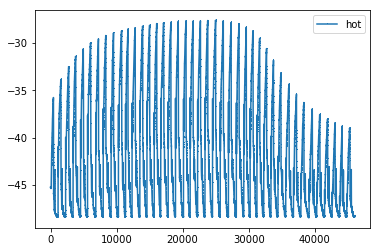

In [89]:
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(hot['power_1'], label='hot', marker=',')
# matplotlib.pyplot.plot(cold['power2'], label='cold', marker=',', alpha=0.5)
matplotlib.pyplot.legend()

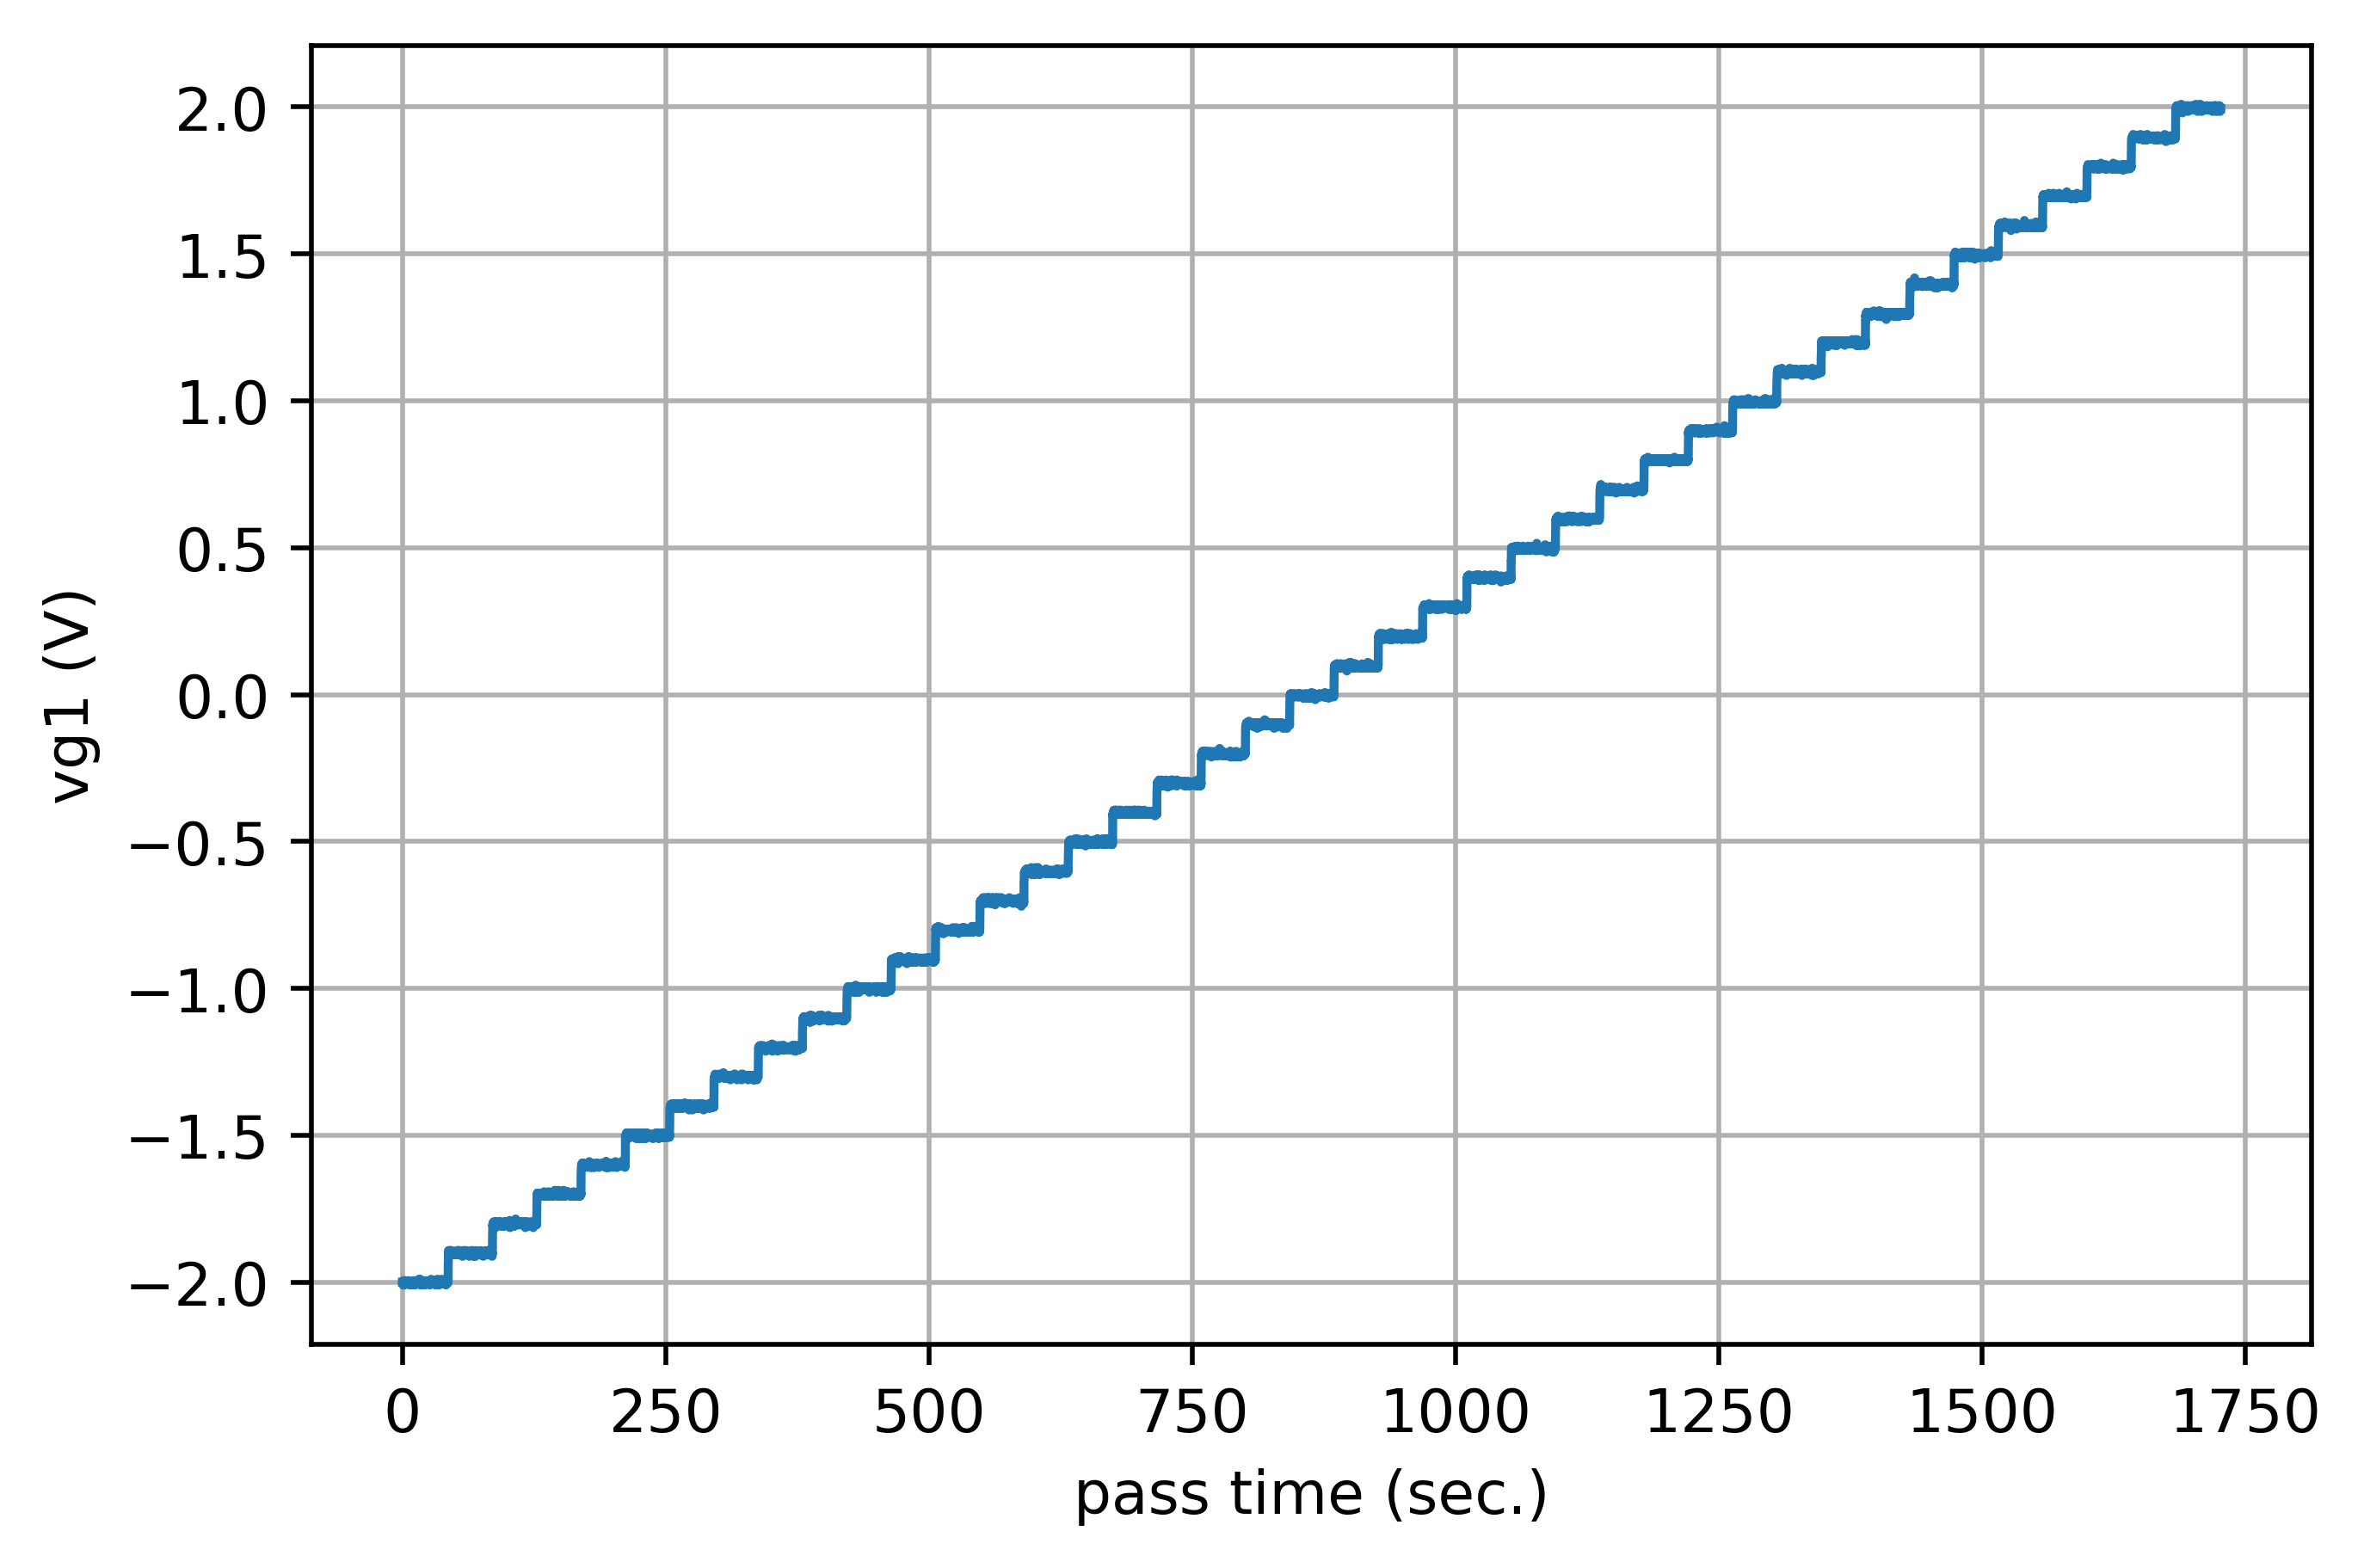

In [90]:
# check 2l hot vg1
matplotlib.pyplot.figure(dpi=500)
matplotlib.pyplot.plot(hot['time']-hot['time'][0], hot['hemt_vg1_2l'])
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('pass time (sec.)')
matplotlib.pyplot.ylabel('vg1 (V)')
# for i in range(-10, 10 + 1):
#     matplotlib.pyplot.plot([0, (hot['ut']-hot['ut'][0])[len(hot['ut'])-1]],[i*0.1, i*0.1], lw=0.5)

(0, 30)

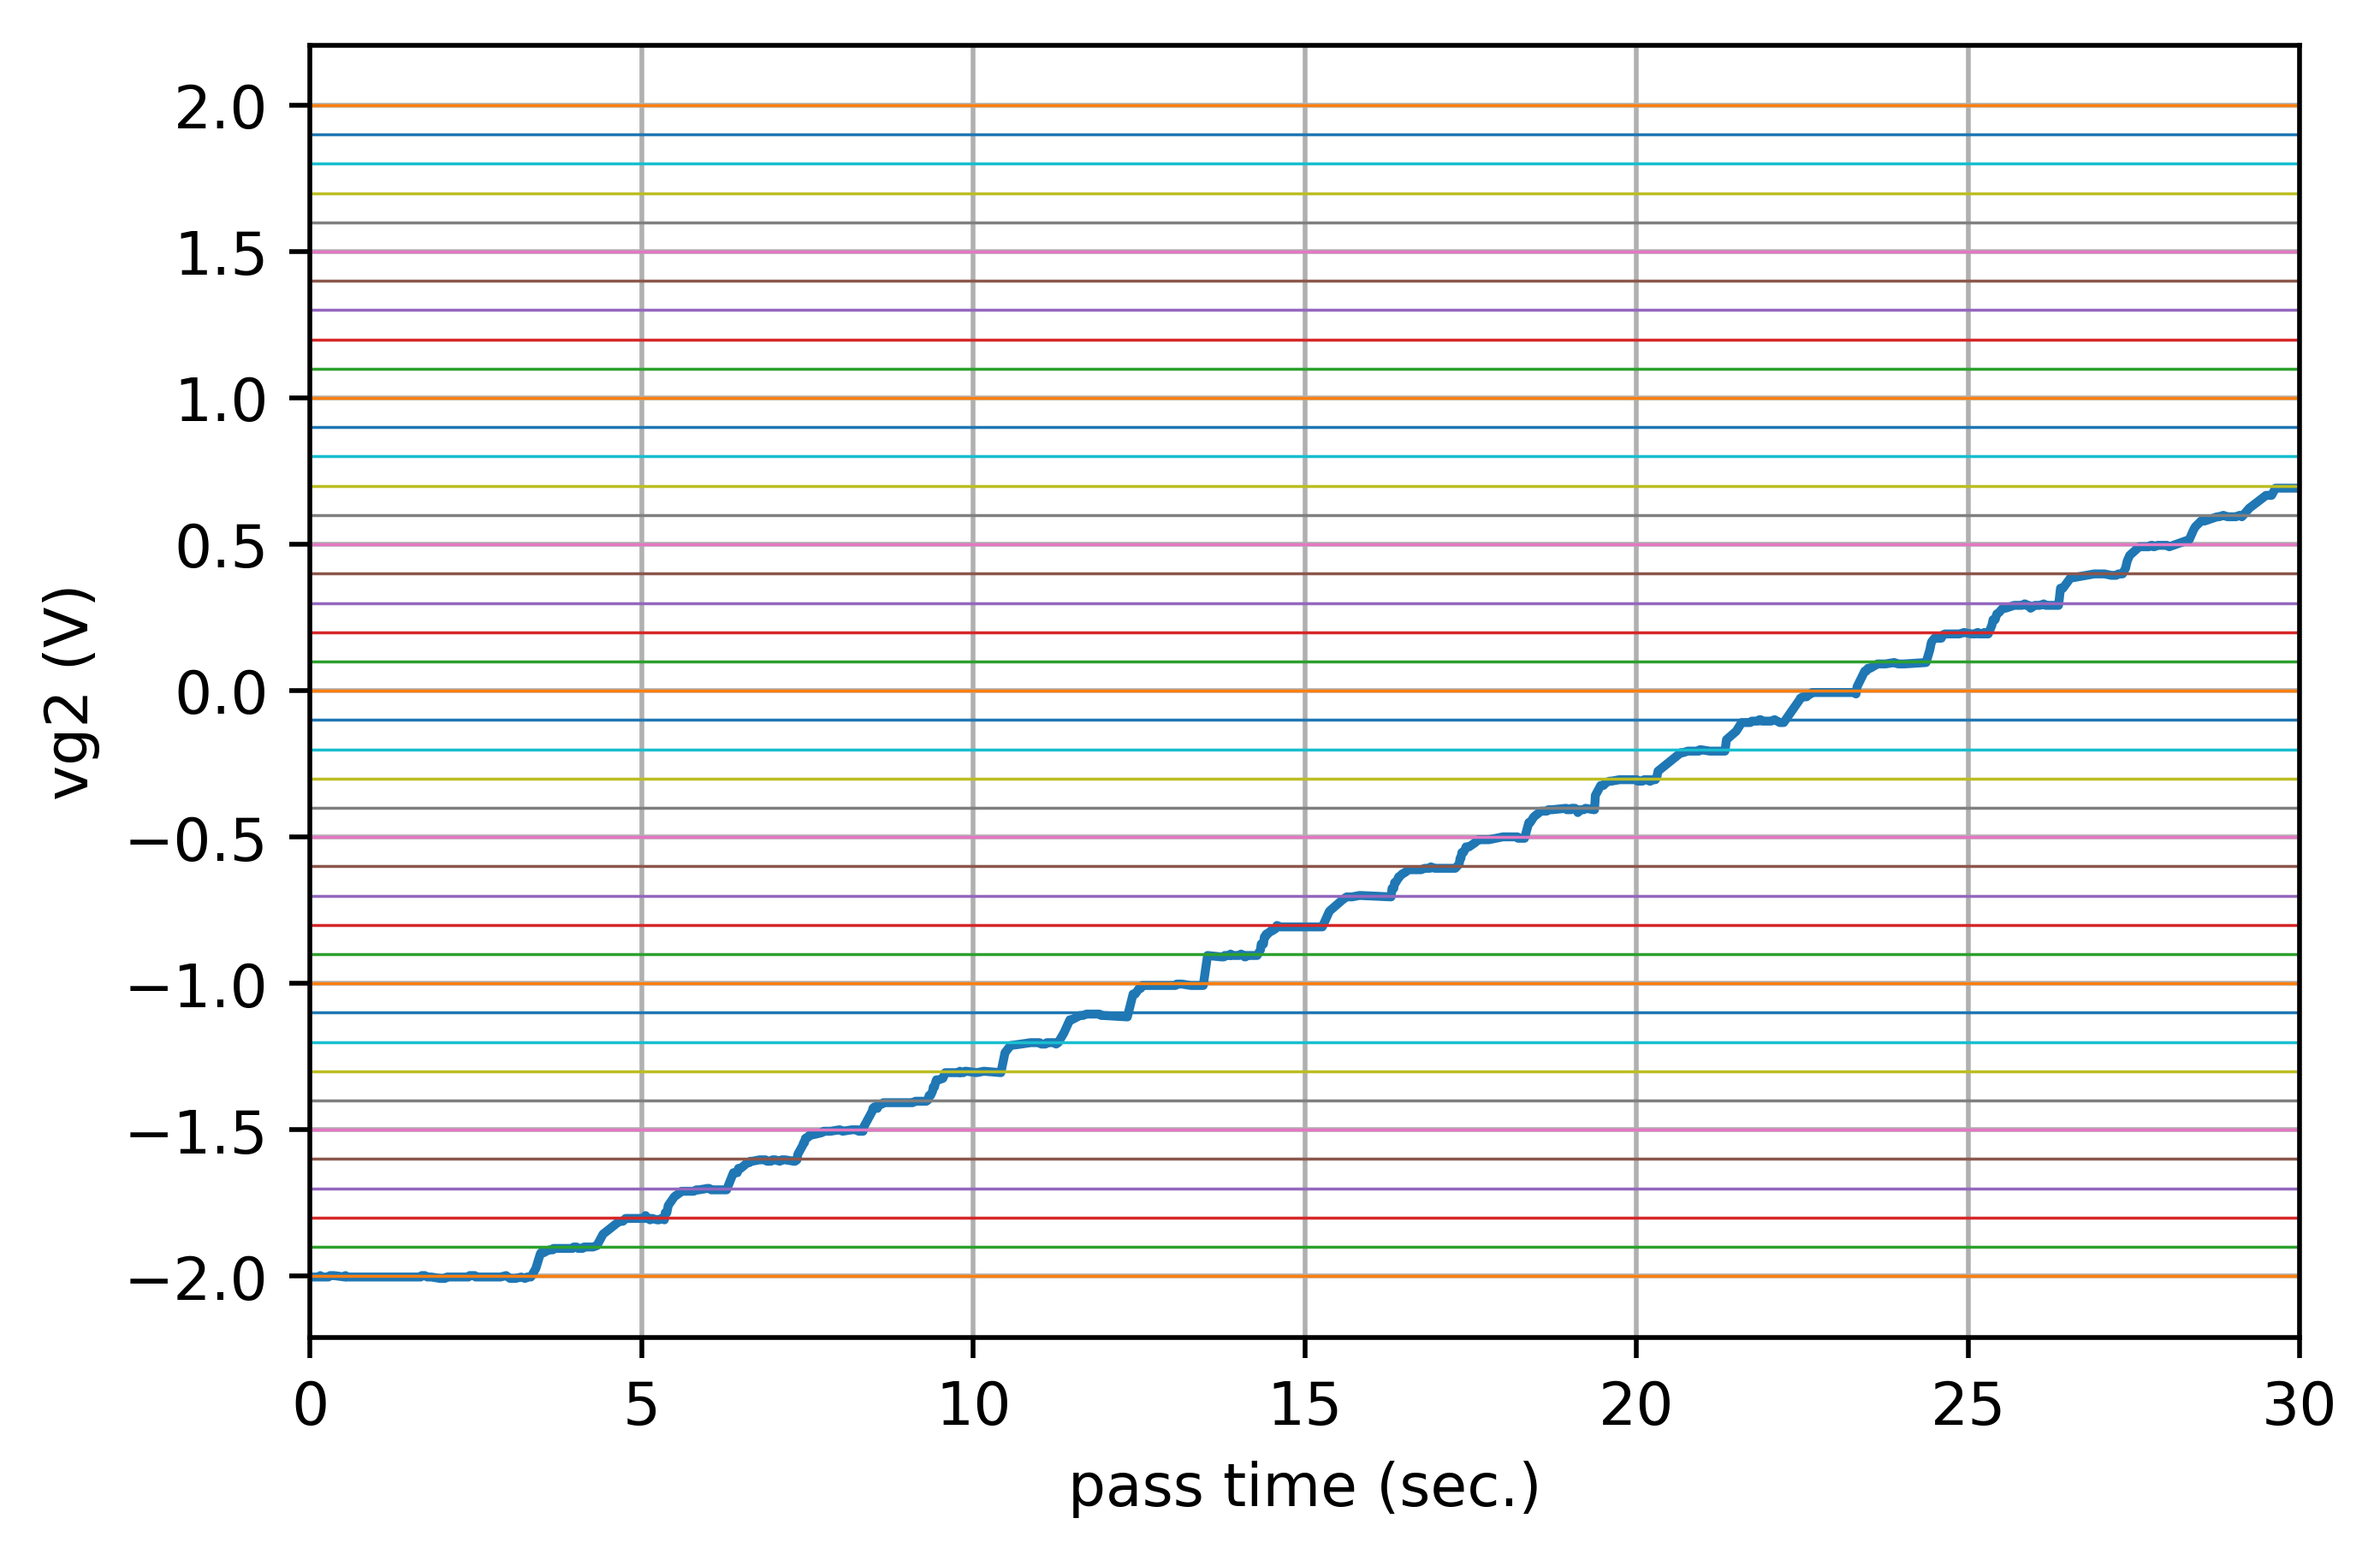

In [91]:
# check 2l hot vg2
matplotlib.pyplot.figure(dpi=500)
matplotlib.pyplot.plot(hot['time']-hot['time'][0], hot['hemt_vg2_2l'],)
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('pass time (sec.)')
matplotlib.pyplot.ylabel('vg2 (V)')
for i in range(-20, 20 + 1):
    matplotlib.pyplot.plot([0, (hot['time']-hot['time'][0])[len(hot['time'])-1]],[i*0.1, i*0.1], lw=0.5)
matplotlib.pyplot.xlim(0, 30)

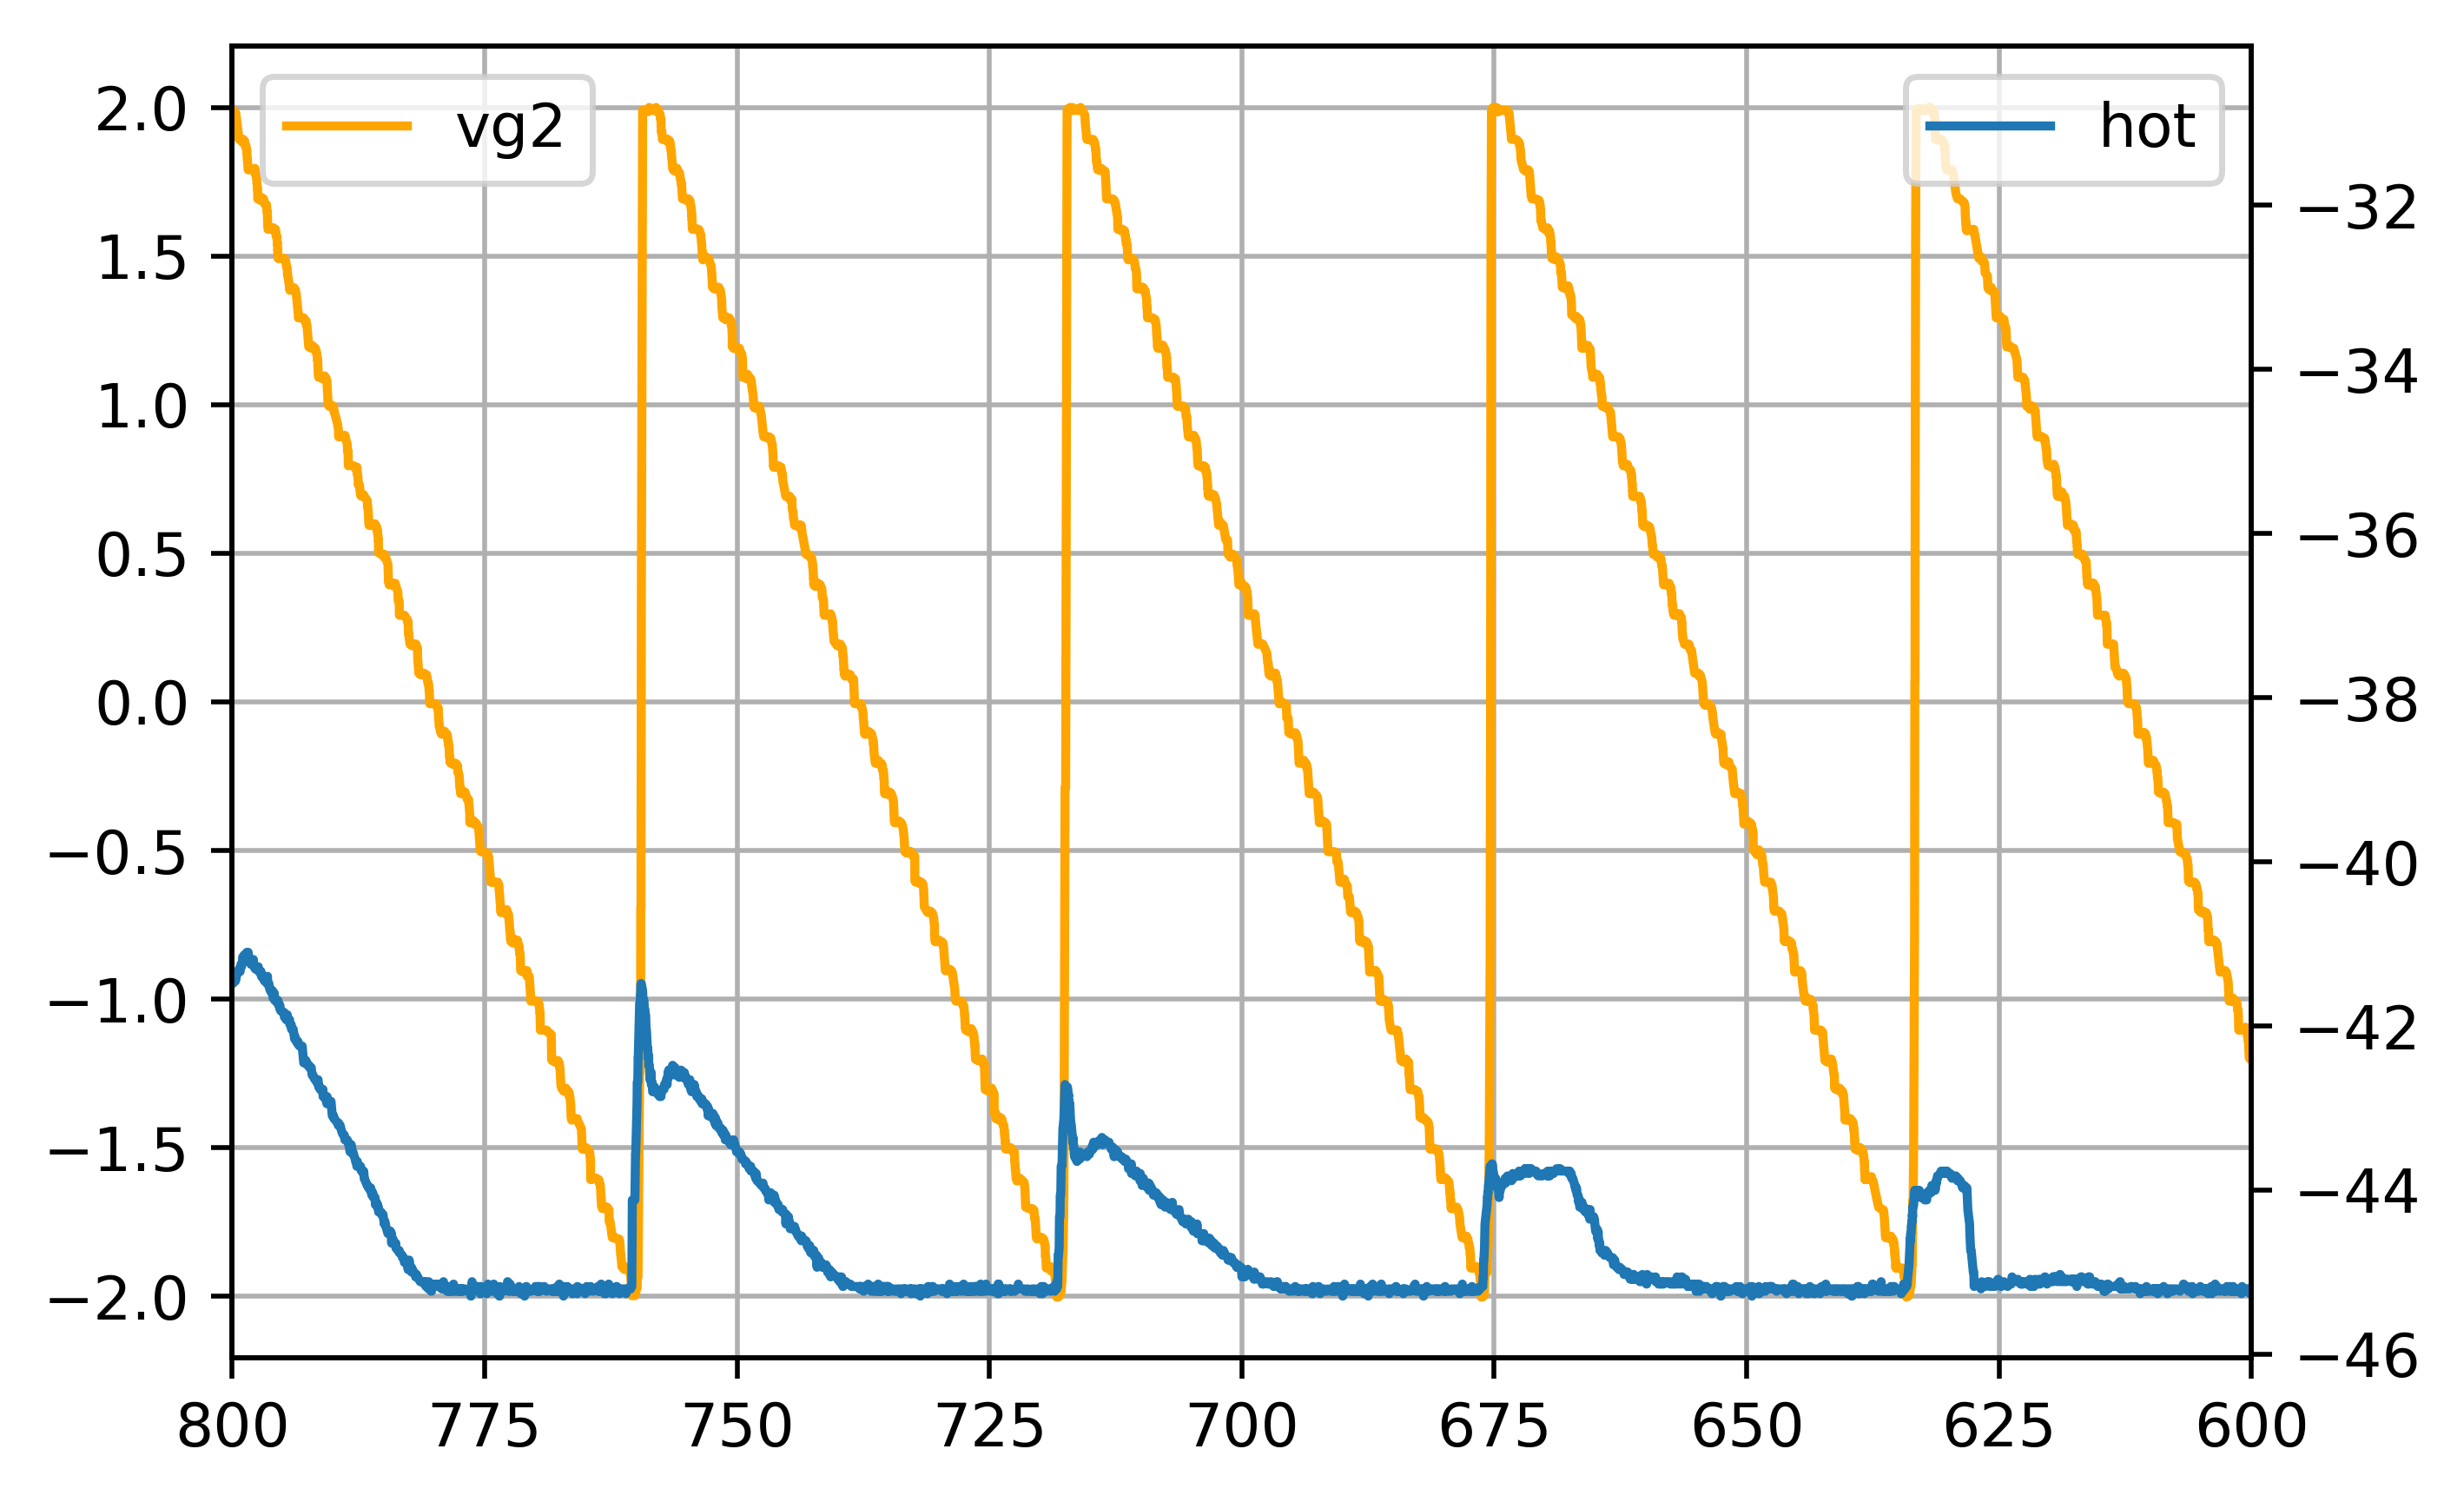

In [129]:
matplotlib.pyplot.figure(dpi=500)
ax = matplotlib.pyplot.subplot(111)
ax1 = ax.twinx()
ax.plot(hot['time']-hot['time'][0], hot['hemt_vg2_2l'], c='orange', label='vg2')
ax1.plot(hot['time']-hot['time'][0], hot['power_2'], label = 'hot')
matplotlib.pyplot.legend()
ax.legend(loc='upper left')
matplotlib.pyplot.xlim(800, 600)
# ax.set_ylim(-0.5, 0.8)
ax.grid()

In [249]:
def sort_vg1(x):
    mask = 0.01
    for i in range(len(bins_vg1)):
        if x >= bins_vg1[i] - mask and x < bins_vg1[i] + mask: return i
        continue
def sort_vg2(x):
    mask = 0.01
    for i in range(len(bins_vg2)):
        if x >= bins_vg2[i] - mask and x < bins_vg2[i] + mask: return i
        continue        

In [250]:
# x : vg1 flag, y : vg2 flag

hot['x'] = hot['hemt_vg1_2l'].apply(sort_vg1)
hot['y'] = hot['hemt_vg2_2l'].apply(sort_vg2)
cold['x'] = cold['hemt_vg1_2l'].apply(sort_vg1)
cold['y'] = cold['hemt_vg2_2l'].apply(sort_vg2)

In [251]:
idx_hot = [[hot['y'][hot['y'] == _y][hot['x'] == _x].index for _y in range(41)] for _x in range(41)]
idx_cold = [[cold['y'][cold['y'] == _y][cold['x'] == _x].index for _y in range(41)] for _x in range(41)]

In [273]:
_hot_vg1 = [[hot['hemt_vg1_2l'][__idx] for __idx in _idx] for _idx in idx_hot]
_hot_vg2 = [[hot['hemt_vg2_2l'][__idx] for __idx in _idx] for _idx in idx_hot]
_power_hot = [[hot['power_2'][__idx] for __idx in _idx] for _idx in idx_hot]
_cold_vg1 = [[cold['hemt_vg1_2l'][__idx] for __idx in _idx] for _idx in idx_cold]
_cold_vg2 = [[cold['hemt_vg2_2l'][__idx] for __idx in _idx] for _idx in idx_cold]
_power_cold = [[cold['power_2'][__idx] for __idx in _idx] for _idx in idx_cold]

In [274]:
_hot_vg1[0][2]

129   -2.004297
130   -2.004297
131   -1.999414
132   -1.999414
133   -1.999414
134   -2.004297
135   -1.999414
136   -1.999414
137   -1.999414
138   -1.999414
139   -1.994531
140   -1.994531
141   -1.999414
142   -1.999414
143   -1.999414
144   -1.999414
145   -1.999414
Name: hemt_vg1_2l, dtype: float64

In [275]:
vg1 = [[_hot_vg1[i][j].mean() for j in range(roop_vg1)]for i in range(roop_vg1)]
vg2 = [[_hot_vg2[i][j].mean() for j in range(roop_vg1)]for i in range(roop_vg1)]
power_hot = [[_power_hot[i][j].mean() for j in range(roop_vg1)]for i in range(roop_vg1)]

In [276]:
vg1 = [[_cold_vg1[i][j].mean() for j in range(roop_vg1)]for i in range(roop_vg1)]
vg2 = [[_cold_vg2[i][j].mean() for j in range(roop_vg1)]for i in range(roop_vg1)]
power_cold = [[_power_cold[i][j].mean() for j in range(roop_vg1)]for i in range(roop_vg1)]

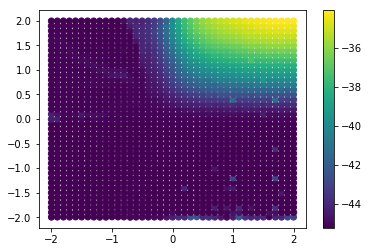

In [277]:
matplotlib.pyplot.scatter(cold_vg1_ave, cold_vg2_ave, c=power_cold)
matplotlib.pyplot.colorbar()

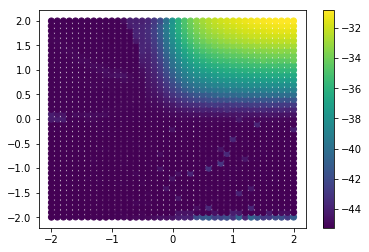

In [278]:
matplotlib.pyplot.scatter(cold_vg1_ave, cold_vg2_ave, c=power_hot)
matplotlib.pyplot.colorbar()

In [279]:
y = [[power_hot[i][j] - power_cold[i][j] for j in range(roop_vg1)] for i in range(roop_vg1)]
Y = [[0 for i in range(roop_vg1)] for j in range(roop_vg1)]
for i in range(roop_vg1):
    for j in range(roop_vg1):
        if y[i][j] <= 0: Y[i][j] = 0
        else: Y[i][j] = 10 ** (y[i][j] / 10)
Trx = [[(77 * Y[i][j] - 300) / (1 - Y[i][j]) for j in range(roop_vg1)] for i in range(roop_vg1)]

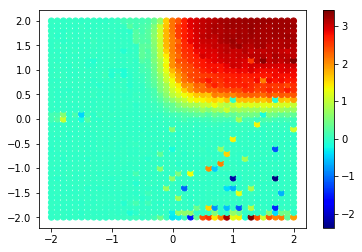

In [280]:
matplotlib.pyplot.scatter(cold_vg1_ave, cold_vg2_ave, c=y, cmap='jet')
matplotlib.pyplot.colorbar()

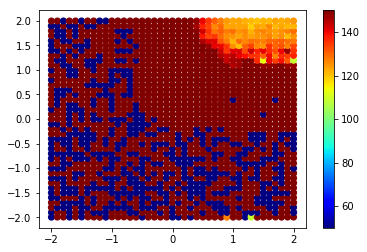

In [281]:
matplotlib.pyplot.scatter(cold_vg1_ave, cold_vg2_ave, c=Trx, cmap='jet')
matplotlib.pyplot.clim(50, 150)
matplotlib.pyplot.colorbar()